# Assignment 2c

## Visualize the data using python libraries matplotlib, seaborn by plotting the graphs-

<ol>
    <ul>
        <li>Pie Chart</li>
        <li>Bar Graph</li>
        <li>Box Plot</li>
        <li>Histogram</li>
        <li>Line Graph</li>
        <li>Scatter Plot</li>
        <li>Heatmap</li>
        <li>Pair Plot</li>
        <li>Word Cloud</li>
    </ul>
</ol>
            

### Import Python Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

#### Read air_quality.csv 

In [2]:
file= pd.read_csv("air_quality.csv")
file

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
0,1,41.0,190.0,7.4,67,5,1,High
1,2,36.0,118.0,8.0,72,5,2,High
2,3,12.0,149.0,12.6,74,5,3,Low
3,4,18.0,313.0,11.5,62,5,4,NaN
4,5,NaN,NaN,14.3,56,5,5,High
...,...,...,...,...,...,...,...,...
148,149,30.0,193.0,6.9,70,9,26,Low
149,150,NaN,145.0,13.2,77,9,27,NaN
150,151,14.0,191.0,14.3,75,9,28,High
151,152,18.0,131.0,8.0,76,9,29,Medium


### Fill the NaN values with mean of respective column

In [4]:
file.isnull().sum()

Unnamed: 0     0
Ozone         37
Solar.R        7
Wind           2
Temp           0
Month          0
Day            0
Humidity      15
dtype: int64

In [9]:
file = file.drop(['Unnamed: 0'], axis = 1)
file

,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
0,41.00000,190.000000,7.4,67,5,1,High
1,36.00000,118.000000,8.0,72,5,2,High
2,12.00000,149.000000,12.6,74,5,3,Low
3,18.00000,313.000000,11.5,62,5,4,High
4,42.12931,185.931507,14.3,56,5,5,High
...,...,...,...,...,...,...,...
148,30.00000,193.000000,6.9,70,9,26,Low
149,42.12931,145.000000,13.2,77,9,27,High
150,14.00000,191.000000,14.3,75,9,28,High
151,18.00000,131.000000,8.0,76,9,29,Medium


In [10]:
file["Ozone"]= file["Ozone"].fillna(file["Ozone"].mean())
file["Solar.R"]= file["Solar.R"].fillna(file["Solar.R"].mean())
file['Wind'].fillna(file['Wind'].mean(), inplace=True)
file['Humidity'] = file['Humidity'].fillna(file['Humidity'].mode()[0])
file

,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
0,41.00000,190.000000,7.4,67,5,1,High
1,36.00000,118.000000,8.0,72,5,2,High
2,12.00000,149.000000,12.6,74,5,3,Low
3,18.00000,313.000000,11.5,62,5,4,High
4,42.12931,185.931507,14.3,56,5,5,High
...,...,...,...,...,...,...,...
148,30.00000,193.000000,6.9,70,9,26,Low
149,42.12931,145.000000,13.2,77,9,27,High
150,14.00000,191.000000,14.3,75,9,28,High
151,18.00000,131.000000,8.0,76,9,29,Medium


In [11]:
file.isnull().sum()

Ozone       0
Solar.R     0
Wind        0
Temp        0
Month       0
Day         0
Humidity    0
dtype: int64

## Pie Chart

[]

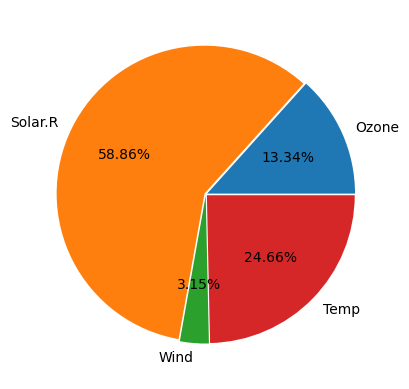

In [12]:
plt.pie([file["Ozone"].mean(), file["Solar.R"].mean(), file["Wind"].mean(), file["Temp"].mean()], autopct="%1.2f%%", explode=[0.01, 0.01, 0.01,0.01], labels=["Ozone", "Solar.R", "Wind", "Temp"])
plt.plot()

## Bar Graph

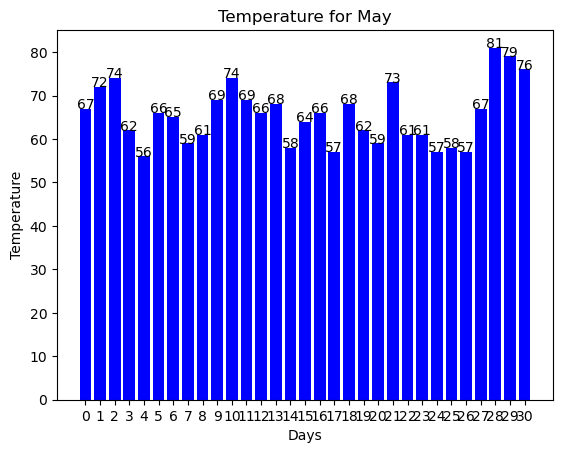

In [24]:
def addlabels(): 
    for i in range(len(file.iloc[0:31, 3])):
        plt.text(i, file.iloc[0:31, 3][i], file.iloc[0:31, 3][i], ha="center")
        
y= np.arange(len(file.iloc[0:31,3]))
addlabels()
plt.bar(x=y, height= file.iloc[0:31, 3], tick_label=y, color="blue")
plt.title("Temperature for May")
plt.xlabel("Days")
plt.ylabel("Temperature")
plt.show()

## Box Plot

[]

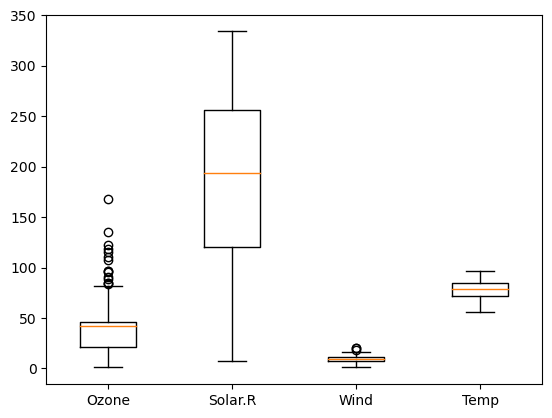

In [25]:
plt.boxplot(x= file[["Ozone","Solar.R", "Wind","Temp"]], labels=["Ozone","Solar.R", "Wind","Temp"])
plt.plot()

## Histogram

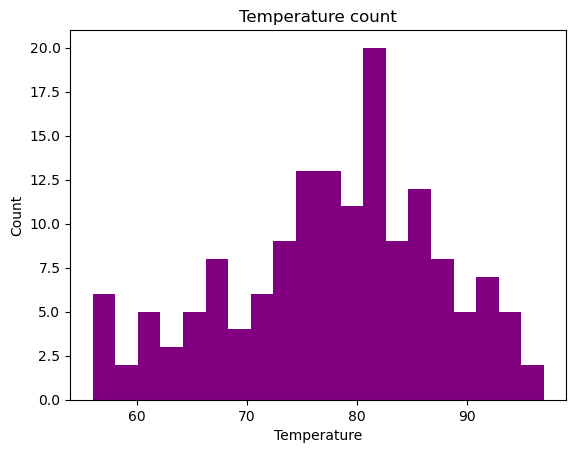

In [26]:
plt.hist(x=file["Temp"], bins=20, color="purple", label="Temp")
plt.title("Temperature count")
plt.xlabel("Temperature")
plt.ylabel("Count")
plt.show()

## Line Graph

Text(0, 0.5, 'Temp')

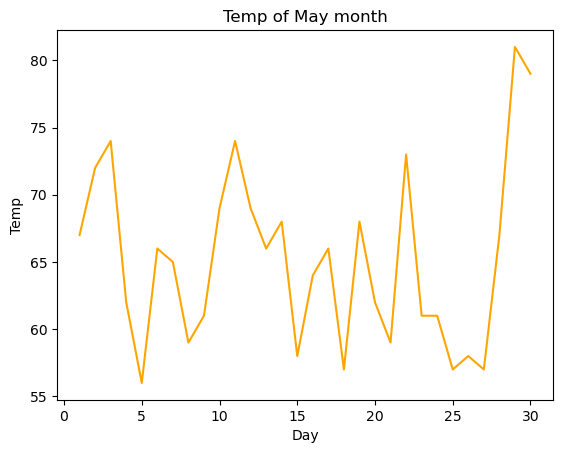

In [28]:
plt.plot(file.iloc[0: 30, 5], file.iloc[0:30, 3], color="orange")
plt.title("Temp of May month")
plt.xlabel("Day")
plt.ylabel("Temp")

## Scatter Plot

Text(0, 0.5, 'Wind')

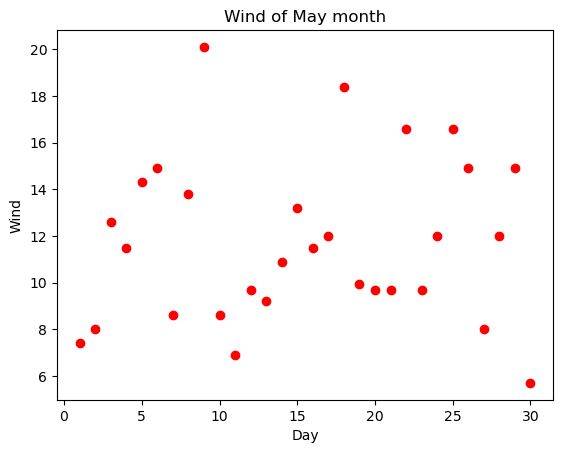

In [29]:
plt.scatter(file.iloc[0:30, 5], file.iloc[0: 30, 2], color="red")
plt.title("Wind of May month")
plt.xlabel("Day")
plt.ylabel("Wind")

## Heat Map

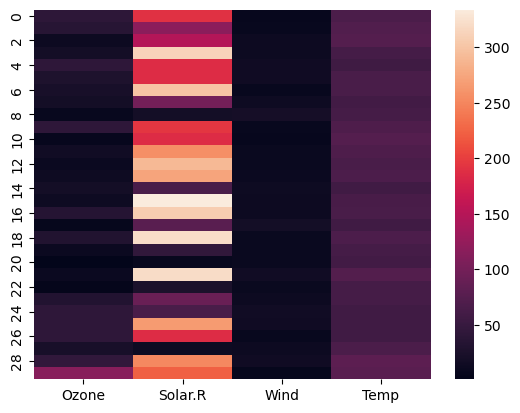

In [31]:
seaborn.heatmap(data=file.iloc[0:30, [0,1,2,3]])
plt.show()

## Pair Plot

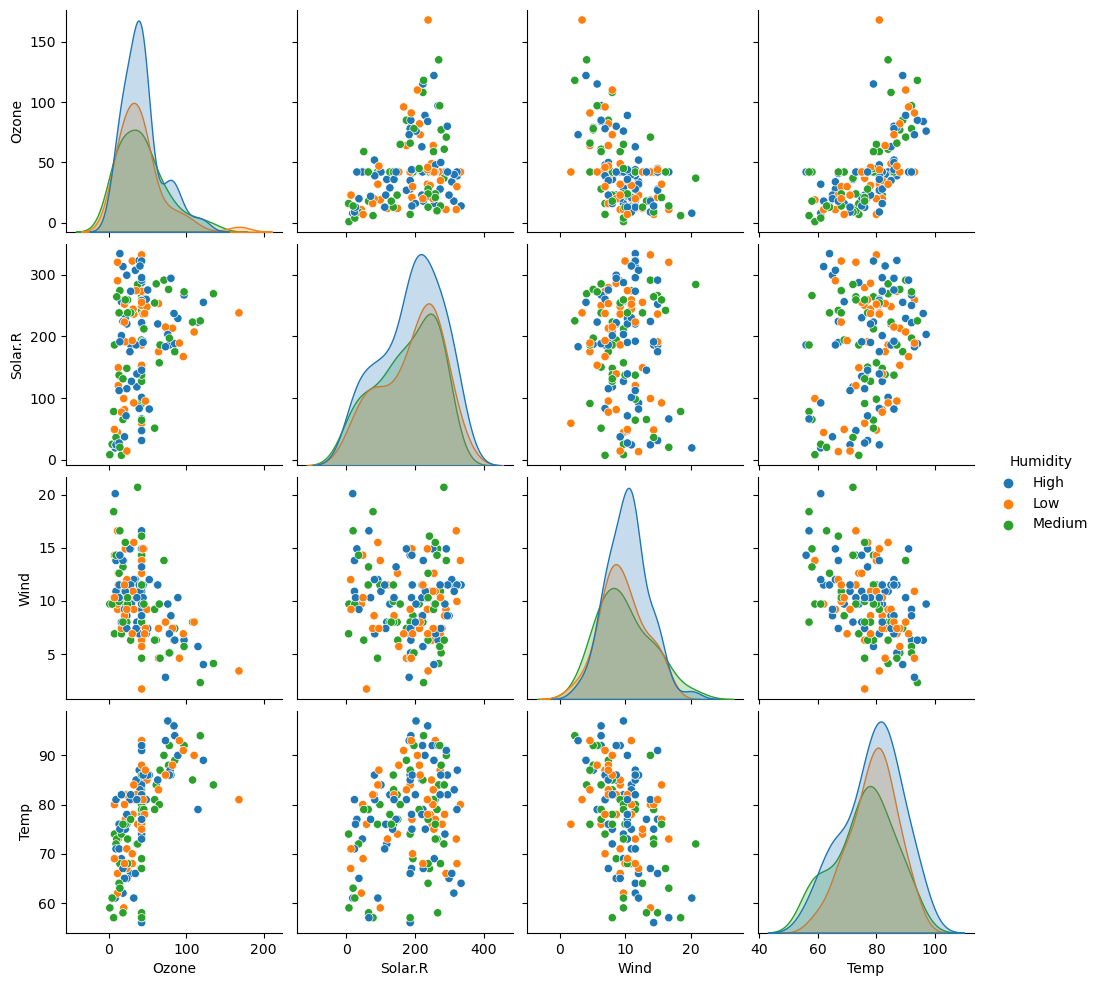

In [32]:
seaborn.pairplot(file.iloc[:, [0,1,2,3,6]], hue="Humidity")
plt.show()

## Word Cloud

In [1]:
from wordcloud import WordCloud, STOPWORDS

with open("text-Copy1.txt", "r") as file:
    text = file.read()

stopwords= set(STOPWORDS)
wordcloud= WordCloud(width= 2500, height= 2500,
                    background_color= 'white',
                    stopwords= stopwords,
                    min_font_size= 16).generate(text)


plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'text-Copy1.txt'